In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\gabri\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6418 entries, 1995-01-03 to 2020-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6418 non-null   float64
 1   MSFT    6418 non-null   float64
 2   F       6418 non-null   float64
 3   GE      6418 non-null   float64
dtypes: float64(4)
memory usage: 250.7 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.406834,3.262354,2.725145
1995-01-04,6.269589,2.424330,3.350130,2.725145
1995-01-05,6.180927,2.384342,3.320871,2.731823
1995-01-06,6.193593,2.424330,3.320871,2.718464
1995-01-09,6.168259,2.409335,3.379390,2.691748


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-06-23,117.730003,201.910004,6.150,6.989521
2020-06-24,116.419998,197.839996,5.950,6.520225
2020-06-25,117.889999,200.339996,6.030,6.670000
2020-06-26,115.230003,196.330002,5.910,6.480000
2020-06-29,117.290001,197.789993,6.015,6.775000


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
mydata.iloc[0]

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

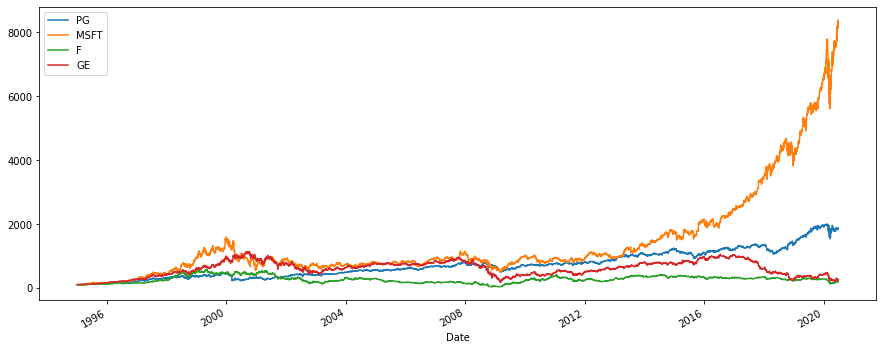

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

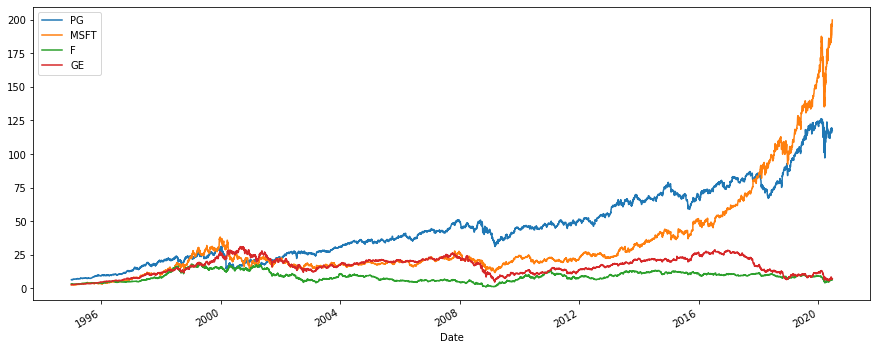

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [8]:
mydata.loc['1995-01-03']

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

In [9]:
mydata.iloc[0]

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [10]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [11]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [12]:
np.dot(returns, weights)

array([        nan,  0.00653977, -0.00922981, ...,  0.01541987,
       -0.02274139,  0.02215122])

***

In [13]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.139768
MSFT    0.221854
F       0.103893
GE      0.086166
dtype: float64

In [14]:
np.dot(annual_returns, weights)

0.13792042638331448

In [15]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

13.791999999999998 %


***

In [16]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [17]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

13.791999999999998 %
16.454 %
